In [ ]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
nbc = pd.read_csv('NBC-Remove-News-Source.csv')
nbc = nbc[:1721]
bbc = pd.read_csv('BBC-Remove-News-Source.csv')
bbc = bbc[:1721]
fox = pd.read_csv('Fox-Remove-News-Source.csv')
fox = fox[:1721]

In [ ]:
#source code 0 for NBC, 1 for BBC, 2 for FOX
nbc['Source Code'] = 0
bbc['Source Code'] = 1
fox['Source Code'] = 2
nbc.head()

,Unnamed: 0,Article Date,Article Text,Article Title,Article URL,Source Code
0,3,Thu Oct 28 2021 01:42:00 GMT+0000 (UTC),delta variant covid19 appear loosen firm choke...,dr jalal baig covid case drop us delta wave over,https://www.nbcnews.com/think/opinion/covid-ca...,0
1,6,Wed Oct 27 2021 12:03:00 GMT+0000 (UTC),washington democrat plan tax billionair excit ...,billionair tax face constitut polit hurdl,https://www.nbcnews.com/politics/politics-news...,0
2,8,Wed Oct 27 2021 03:31:00 GMT+0000 (UTC),men kyle rittenhous shot protest polic brutal ...,men shot rittenhous cant call victim trial rio...,https://www.nbcnews.com/news/us-news/men-shot-...,0
3,14,Thu Oct 28 2021 00:18:34 GMT+0000 (UTC),nearli 500000 home busi new england electr wed...,noreast restor power new england day strong wind,https://www.nbcnews.com/news/weather/easter-30...,0
4,15,Wed Oct 27 2021 22:29:35 GMT+0000 (UTC),late 2017 facebook final stage prepar major ch...,emoji reaction cute addit facebook headach,https://www.nbcnews.com/tech/tech-news/emoji-r...,0


In [ ]:
#merge dfs and remove anything with a null title
frames = [nbc, bbc, fox]
df = pd.concat(frames)
df = df.dropna(subset = ['Article Title'])

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
#Separate categories (Source Code) from data
y = df['Source Code']
x = df.drop(columns = ['Source Code'])
y.value_counts()

2    1721
1    1721
0    1663
Name: Source Code, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Dictionary with all unique words and their count:
word_freq = dict()
for row in X_train['Article Title']:
    for word in row.split():
        if word not in word_freq:
            word_freq[word] = 0

In [ ]:
#count values
for row in X_train['Article Title']:
    for word in row.split():
        word_freq[word] = word_freq[word] + 1
for row in X_test['Article Title']:
    for word in row.split():
        if word in word_freq:
            word_freq[word] = word_freq[word] + 1

In [ ]:
def feature_vector_func(sentence):
    feature_vector = {x:0 for x in word_freq} # Put 0-s instead of counting every unique word
    word_list = sentence.split()
    for word in feature_vector:
        if word in word_list:
            feature_vector[word] = feature_vector[word] + 1
        else:
            feature_vector[word] = feature_vector[word]
    return(feature_vector)

In [ ]:
X_train['feature_vector_dict'] = X_train['Article Title'].apply(lambda x: feature_vector_func(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_train.head()

,Unnamed: 0,Article Date,Article Text,Article Title,Article URL,feature_vector_dict
4160,1503,2019-02-08T16:24:24.000Z,just hour temporari stay expir midnight suprem...,rule mean roe v wade,https://www.bbc.co.uk/news/world-us-canada-471...,"{'rule': 1, 'mean': 1, 'roe': 1, 'v': 1, 'wade..."
4086,2376,Wed Sep 29 2021 22:32:00 GMT+0000 (UTC),year stayathom order remot worker maintain upg...,7 ergonom offic chair work home 2021,https://www.nbcnews.com/select/shopping/best-e...,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade..."
944,930,2015-03-09T01:26:53.000Z,nigerian truck driver surviv journey boko hara...,boko haram crisi nigerian trucker risk attack,https://www.bbc.co.uk/news/world-africa-31533391,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade..."
2351,4195,Tue Aug 03 2021 20:58:00 GMT+0000 (UTC),washington presid joe biden call new york gov ...,biden call gov cuomo resign investig find sexu...,https://www.nbcnews.com/politics/politics-news...,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade..."
3425,10,10/26/21 15:32,student loudoun counti virginia stage walkout ...,dozen loudoun counti student stage walkout sex...,https://www.foxnews.com/us/loudoun-county-stud...,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade..."


In [ ]:
X_test['feature_vector_dict'] = X_test['Article Title'].apply(lambda x: feature_vector_func(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test.head()

,Unnamed: 0,Article Date,Article Text,Article Title,Article URL,feature_vector_dict
4139,1644,2020-01-29T01:19:29.000Z,time atmospher east room white hous parti news...,trump middl east peac plan deal centuri huge g...,https://www.bbc.co.uk/news/world-middle-east-5...,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade..."
586,1957,2017-10-10T23:00:23.000Z,year awar uk unrecycl cup mountain hard buy ta...,solut dispos coffe cup problem,http://www.bbc.co.uk/news/business-40951041,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade..."
553,1744,10/25/21 6:48,bodi miss texa man recov sunday wyom grand tet...,bodi miss texa man recov grand teton nation park,http://www.foxnews.com/us/body-of-missing-texa...,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade..."
227,2471,Wed Oct 06 2021 20:46:00 GMT+0000 (UTC),sleep bodi regener particular it skin get chan...,sheet pillowcas worth consid 2021,https://www.nbcnews.com/shopping/bedroom/silk-...,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade..."
1321,226,Thu Oct 21 2021 18:28:00 GMT+0000 (UTC),respond grow controversi invest practic feder ...,fed offici ban own individu stock jerom powel ...,https://www.nbcnews.com/business/business-news...,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade..."


In [ ]:
#Function that converts the dict "feature_vector" into an array:
def dict_to_array(vector):
    data = list(vector.values())
    an_array = np.array(data)
    return(an_array)

In [ ]:
X_train['feature_vector_array'] = X_train['feature_vector_dict'].apply(lambda x: dict_to_array(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import itertools
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def standard(row):
    standardized_array = scaler.fit_transform(np.array(row).reshape(-1,1))
    return(standardized_array)

In [ ]:
X_train['standard_array'] = X_train['feature_vector_array'].apply(lambda x: standard(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_train.head()

,Unnamed: 0,Article Date,Article Text,Article Title,Article URL,feature_vector_dict,feature_vector_array,standard_array
4160,1503,2019-02-08T16:24:24.000Z,just hour temporari stay expir midnight suprem...,rule mean roe v wade,https://www.bbc.co.uk/news/world-us-canada-471...,"{'rule': 1, 'mean': 1, 'roe': 1, 'v': 1, 'wade...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[37.5259909929105], [37.5259909929105], [37.5..."
4086,2376,Wed Sep 29 2021 22:32:00 GMT+0000 (UTC),year stayathom order remot worker maintain upg...,7 ergonom offic chair work home 2021,https://www.nbcnews.com/select/shopping/best-e...,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[[-0.03153505097921043], [-0.03153505097921043..."
944,930,2015-03-09T01:26:53.000Z,nigerian truck driver surviv journey boko hara...,boko haram crisi nigerian trucker risk attack,https://www.bbc.co.uk/news/world-africa-31533391,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[[-0.03153505097921043], [-0.03153505097921043..."
2351,4195,Tue Aug 03 2021 20:58:00 GMT+0000 (UTC),washington presid joe biden call new york gov ...,biden call gov cuomo resign investig find sexu...,https://www.nbcnews.com/politics/politics-news...,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-0.03769962971605538], [-0.03769962971605538..."
3425,10,10/26/21 15:32,student loudoun counti virginia stage walkout ...,dozen loudoun counti student stage walkout sex...,https://www.foxnews.com/us/loudoun-county-stud...,"{'rule': 0, 'mean': 0, 'roe': 0, 'v': 0, 'wade...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[-0.03954251533266946], [-0.03954251533266946..."


In [ ]:
X_test['feature_vector_array'] = X_test['feature_vector_dict'].apply(lambda x: dict_to_array(x))
X_test['standard_array'] = X_test['feature_vector_array'].apply(lambda x: standard(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Rearranging the data for the Naive Bayes prediction:
def array_of_arrays(row):
    list_standard = []
    for i in range(0, len(row)):
        list_standard.append((row[i][0]))
    return (np.array(list_standard))

In [ ]:
X_train['standard_array_clean'] = X_train['standard_array'].apply(lambda x: array_of_arrays(x))
X_test['standard_array_clean'] = X_test['standard_array'].apply(lambda x: array_of_arrays(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_X = X_train['standard_array_clean']
test_X = X_test['standard_array_clean']

In [ ]:
train_X = pd.DataFrame(train_X.to_list()).to_numpy()
test_X = pd.DataFrame(test_X.to_list()).to_numpy()

In [ ]:

#Check that there is no "Nan" values:

for array in test_X:
    array_sum = np.sum(array)
    array_has_nan = np.isnan(array_sum)
print(array_has_nan)

False


In [ ]:
n = train_X.shape[0] #number of rows
d = train_X.shape[1] #number of unique words = features in feature vector
K = 3 #number of classes - label 1 or label 0

psis = np.zeros([K,d])
phis = np.zeros([K])

In [ ]:
for k in range(K):
    X_k = train_X[y_train == k]
    phis[k] = X_k.shape[0] / float(n)
    psis[k] = np.mean(X_k, axis=0)

In [ ]:
# implement this in numpy
def nb_predictions(x, psis, phis):
    # adjust shapes
    n , d = x.shape
    x = np.reshape(x, (1,n,d))
    psis = np.reshape(psis, (K, 1, d))
    
    psis = psis.clip(1e-14, 1-1e-14) 
    
    # compute log-probabilities
    logpy = np.log(phis).reshape(K,1)
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

In [ ]:
predicted_train, logpyx = nb_predictions(train_X, psis, phis)

In [ ]:
(predicted_train == y_train).mean()

0.8599412340842312

In [ ]:
predicted_test, logpyx_test = nb_predictions(test_X, psis, phis)

In [ ]:
(predicted_test == y_test).mean()

0.6748285994123409

In [ ]:
actual = y_test
predictions = predicted_test

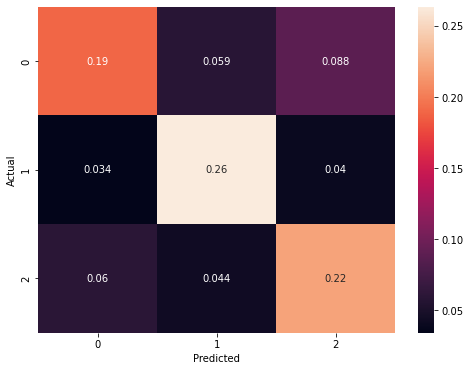

In [ ]:

# get actual and create heatmap 
confusion_matrix = pd.crosstab(actual, predictions , rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#RIDGE
unique_words_list = list(word_freq.keys())

In [ ]:
train_X_feat_vect = pd.DataFrame(X_train['feature_vector_array'].to_list())
train_X_feat_vect.columns = list(word_freq.keys())
test_X_feat_vect = pd.DataFrame(X_test['feature_vector_array'].to_list())
test_X_feat_vect.columns = list(word_freq.keys())

In [ ]:
model_ridge = LogisticRegressionCV(cv=10, penalty='l2', solver='liblinear').fit(train_X_feat_vect, y_train)

In [ ]:
predicted_ridge_test = model_ridge.predict(test_X_feat_vect)
predicted_ridge_test

array([1, 1, 2, ..., 2, 2, 2])

In [ ]:
model_ridge.score(test_X_feat_vect, y_test)

0.7247796278158668

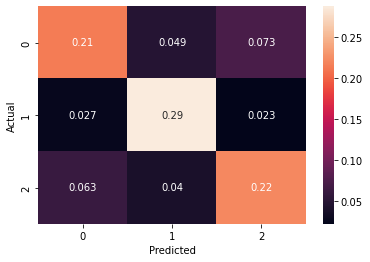

In [ ]:
# get actual and create heatmap 
actual = y_test
predictions_ridge = predicted_ridge_test
confusion_matrix = pd.crosstab(actual, predictions_ridge , rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
model_ridge.coef_
coeffs_ridge = list(np.argsort(model_ridge.coef_))

In [ ]:

# most important words:
most_important = coeffs_ridge[0][::-1]
for i in range(0,10):
    print(unique_words_list[most_important[i]])

us
choos
bipartisan
best
koala
ransomwar
tracker
un
7
percent


In [ ]:
least_important = coeffs_ridge[0]
for i in range(0,10):
    print(unique_words_list[least_important[i]])

halloween
scotland
dem
thing
doe
inaugur
rust
impeach
jab
mp


In [ ]:
#LASSO
model_lasso = LogisticRegressionCV(cv=10, penalty='l1', solver='liblinear').fit(train_X_feat_vect, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [ ]:
predict_lasso = model_lasso.predict(test_X_feat_vect)
predict_lasso

array([1, 1, 2, ..., 0, 2, 2])

In [ ]:
model_lasso.score(test_X_feat_vect, y_test)

0.7061704211557297

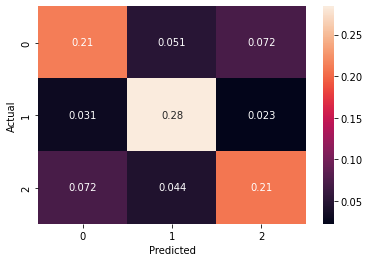

In [ ]:

actual = y_test
predictions_lasso = predict_lasso
confusion_matrix = pd.crosstab(actual, predictions_lasso , rownames=['Actual'], colnames=['Predicted'], normalize=True)
plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True)

In [ ]:

model_lasso.coef_
coeffs_lasso = list(np.argsort(model_lasso.coef_))

In [ ]:

# most important words:
most_important = coeffs_lasso[0][::-1]
for i in range(0,10):
    print(unique_words_list[most_important[i]])

bipartisan
lyft
koala
shooter
choos
tokyo
coup
gorilla
negoti
allelectr


In [ ]:

least_important = coeffs_lasso[0]
for i in range(0,10):
    print(unique_words_list[least_important[i]])

thing
mp
halloween
inaugur
farleft
haunt
dem
chri
contract
wit
